# 딥러닝 + 파이토치 기초

### 딥러닝 개념



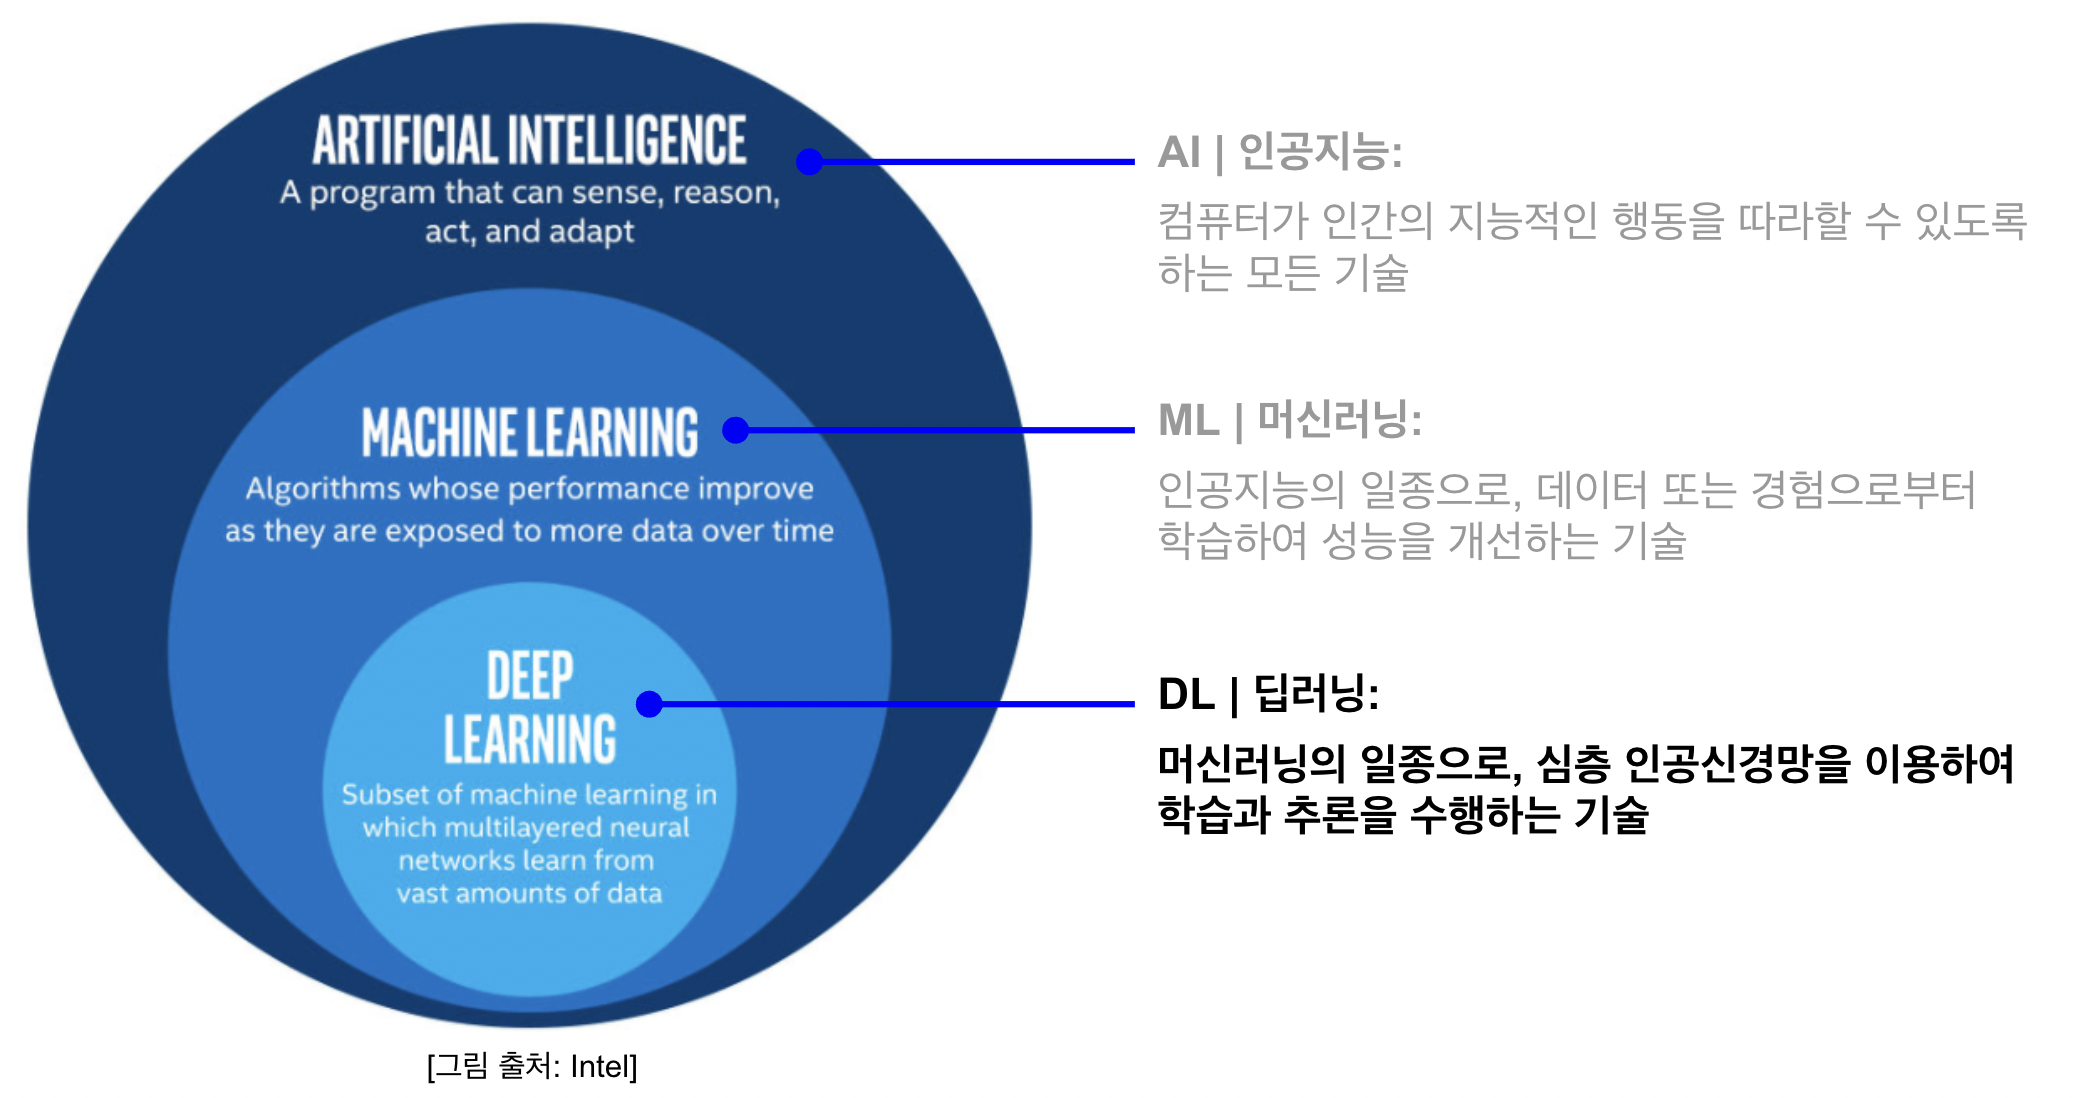

## 파이토치 사용법

공식 튜토리얼 링크: https://tutorials.pytorch.kr/beginner/basics/intro.html

1. 파이토치 모듈 임포트
2. 데이터셋 불러오기
3. 데이터로더에 담기
4. 신경망 모델 만들기
5. 학습하기
6. 학습된 모델 저장 / 불러오기
7. 결과 평가


## 1. 파이토치 모듈 임포트

위 1 ~ 6번 과정에서 필요한 모듈(torch, torchvision 등)을 여기서 모두 import 합니다.  
  
7번의 경우 confusion matrix를 위해 추가 모듈이 필요한데, 그 때 추가로 import 하겠습니다.  

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt   # 중간에 이미지 가시화를 위해


## 2. 데이터셋 불러오기

파이토치에서는 이미지 분류, 물체탐지(object detection), 이미지 캡셔닝 등의 학습을 위해 공개된 다양한 데이터셋을 빌트인으로 제공하고 있습니다.  
여기서는 이미지 분류용으로 비교적 다루기 간단한 Fashion MNIST 데이터를 활용하도록 하겠습니다.  
  
참고로 실전에는 이렇게 깔끔하게 정리된 데이터가 주어지지 않기 때문에, 대부분의 시간을 데이터를 준비하고 전처리 하는데에 쓰게 됩니다.  
특히, 단순한 이미지 분류가 아닌 물체탐지 문제의 경우 별도 라벨링 과정도 필요합니다.  


In [ ]:
# Fashion MNIST 학습용 데이터 (Dataset 객체)
#   학습용 이미지와 정답 데이터를 다운로드 받고 Dataset 객체로 리턴합니다.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Fashion MNIST 테스트용 데이터 (Dataset 객체)
#   테스트용 이미지와 정답 데이터를 다운로드 받고 Dataset 객체로 리턴합니다.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  
데이터가 어떻게 담겼는지 한번 살펴볼까요?  
각각 60,000장, 10,000장의 이미지와 정답 데이터가 담겨 있습니다.  


In [ ]:
print(training_data)
print()

print(test_data)
print()

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()




이제 샘플 데이터의 내부를 한번 들여다 보죠.  
이렇게 데이터를 확인하면서 진행해야 제대로 하고 있는지 점검이 가능합니다.  
꼭 습관화 하도록 합시다.  


In [ ]:
image, label = training_data[0]

print('label:', label)

print('image type:', type(image))
print('image shape:', image.shape)
print('image data:', image)


label: 9
image type: <class 'torch.Tensor'>
image shape: torch.Size([1, 28, 28])
image data: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.00

  
이미지의 픽셀 값이 0 ~ 1로 이미 normalize 되어 있습니다. 그대로 사용하여 신경망을 학습해도 문제 없을 것 같네요.  
참고로 값이 크면 (예: 0 ~ 255), 신경망 훈련에 악영항을 주게 됩니다.  (예: gradient exploding 문제)  
  
숫자만으로 보기에는 부족한 감이 있으니, 화면에 그려 보도록 하죠.  
  

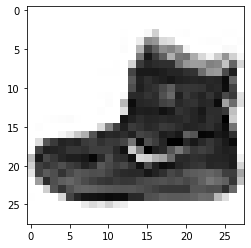

In [ ]:
img = image.squeeze()   # [1, 28, 28] -> [28, 28]
plt.imshow(img, cmap='Greys')  # default color map: viridis
plt.show()


랜덤하게 몇 장 더 그려볼까요?  
  
라벨까지 같이 표현하면 좋겠죠?  
라벨은 총 10가지로 0 ~ 9까지의 숫자로 표현되어 있습니다.  
사람이 알아볼 수 있게 텍스트로 매핑해 보겠습니다.  
  

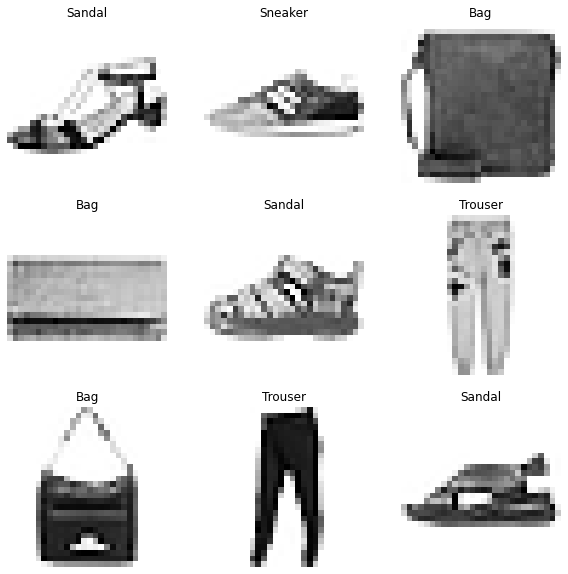

In [ ]:
# 라벨 매핑
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

# 랜덤 이미지 9장 그려보기 (3 by 3 그리드)
figure = plt.figure(figsize=(10, 10))

cols, rows = 3, 3

import random
# random.seed(1)
for i in range(1, cols * rows + 1):
    # 랜덤 인덱스 선정
    # sample_idx = torch.randint(len(training_data), size=(1,)).item()
    sample_idx = random.randint(0, len(training_data))

    # 같은 인덱스로 이미지, 라벨 추출
    img, label = training_data[sample_idx]

    # 맞는 위치에 subplot 추가
    figure.add_subplot(rows, cols, i)

    # 텍스트 라벨을 그림 제목으로 나타냄
    plt.title(labels_map[label])

    # 축 없애기
    plt.axis("off")

    # subplot에 이미지 그리기
    plt.imshow(img.squeeze(), cmap='Greys')

# 전체 plot을 화면에 나타내기
plt.show()


## 3. 데이터로더에 담기

데이터로더는 신경망에 데이터를 공급하기 위한 자료구조입니다.  
  
주어진 설정에 따라서 랜덤 셔플, 데이터 증강 등을 수행할 수 있고, 배치 사이즈로 나눠서 공급하는 등의 역할을 수행합니다.  
  
여기서는 배치 사이즈만 정하면서 위에서 준비한 데이터셋을 데이터로더에 담아보겠습니다.  


In [ ]:
batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


In [ ]:
# 데이터로더는 반복문으로 순환할 수 있습니다. 데이터 크기를 확인해 봅니다.
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    print(y)
    break


Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5])


## 4. 신경망 모델 만들기

여기서는 간단히 hidden layer 2개를 가지는 MLP 모델을 만들어 사용해 보도록 하겠습니다.  
  
MLP: Multi-Layer Perceptron 


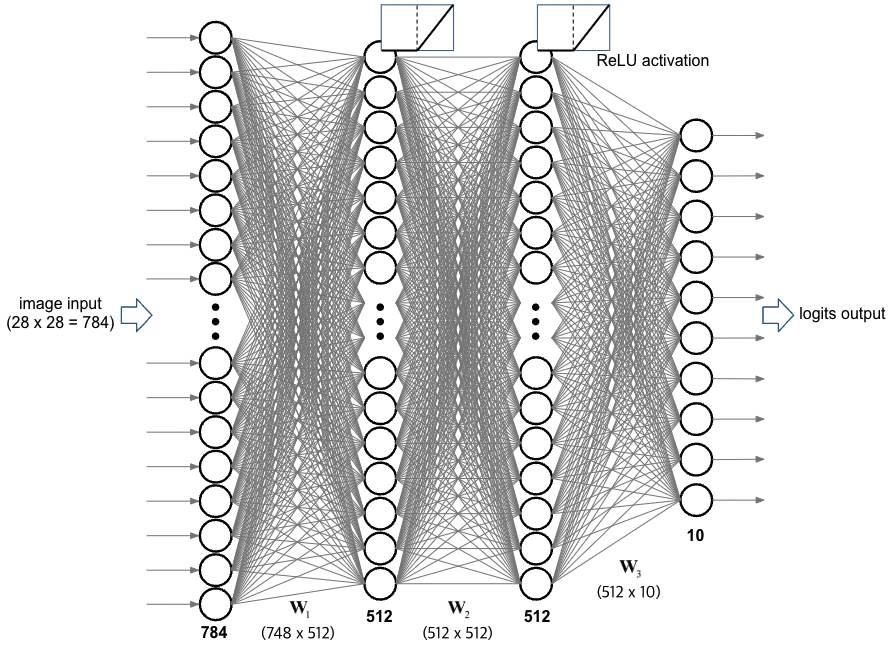

In [ ]:
# 모델 클래스를 정의합니다.
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        self.flatten = nn.Flatten()   # 2d -> 1d로 펼치는 레이어 함수 선언

        # 레이어들을 순차적으로 쌓아서 묶어주는 함수의 선언
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),    # 784 -> 512로 전연결 (첫번째 hidden layer)
            nn.ReLU(),                # ReLU activation
            nn.Linear(512, 512),      # 512 -> 512로 전연결 (두번째 hidden layer)
            nn.ReLU(),                # ReLU activation
            nn.Linear(512, 10)        # 512 -> 10 으로 전연결 (출력 layer)
        )

    # 순방향 추론 함수입니다. 생성자에서 만든 레이어 함수들을 사용하여 순전파를 수행합니다.
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


# 위에서 정의된 모델 클래스로 모델 객체(인스턴스)를 하나 만듭니다.
model = NeuralNetwork()

# 모델의 내용을 출력해 봅시다.
print(model)


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# 모델을 장치로 보냅니다.
model = model.to(device)


Using cuda device


## 5. 학습하기

학습을 위해 먼저 손실함수, 최적화 함수를 선언합니다.  
  
- 손실함수(loss function): Cross Entropy  
  
- 최적화 함수(optimization function): Stochastic Gradient Descent  

최적화 함수에 대해 더 자세히 알고 싶다면 아래 블로그를 참고해 보세요 (해외 유명 게시글의 한글 번역 버전)  
https://brunch.co.kr/@chris-song/50


(주의: model을 target device로 보낸 후에 (위 to(device) 함수), optimizer를 정의해야 합니다.  
그렇지 않으면 에러가 발생합니다.)  


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


학습용 함수를 정의합니다.


In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    # 신경망 모델을 학습용으로 셋팅합니다.
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        # 데이터를 device (GPU)에 탑재
        X, y = X.to(device), y.to(device)

        # 예측(추론) 수행
        pred = model(X)

        # 예측 오류 계산
        loss = loss_fn(pred, y)

        # 역전파 시작을 위해 gradient를 0으로 초기화
        optimizer.zero_grad()

        # loss부터 시작하여 역전파 수행
        # 이를 통해 각 weight에 대한 loss의 gradient가 모두 계산됨 (auto grad)
        loss.backward()

        # 최적화 함수가 위에서 계산된 gradient 값을 사용하여 weight 갱신
        optimizer.step()

        # 100번 반복할 때마다 결과 출력
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


테스트에 사용할 함수도 정의합니다.

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    # 신경망 모델을 평가용으로 셋팅합니다.
    model.eval()

    test_loss, correct = 0, 0

    # 테스트를 할 때에는 gradient를 계산할 필요가 없습니다.
    with torch.no_grad():
        for X, y in dataloader:
            # 데이터를 device (GPU)에 탑재
            X, y = X.to(device), y.to(device)

            # 예측 수행
            pred = model(X)

            # print(pred.shape)

            # 예측 오류를 계산하여 총합에 더함
            test_loss += loss_fn(pred, y).item()

            # 예측 결과가 (출려값 중 가장 큰 값의 인덱스) 라벨과 일치하는 갯수 세기
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    # 테스트 결과 출력
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


데이터를 공급하면서 반복 학습을 진행합니다.


In [ ]:
# 1 epoch = 데이터 전체를 1회 순환  (1 epoch 당 반복 수 = 학습용 데이터 수 / 배치 사이즈)
epochs = 20

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")

    # 모든 학습 데이터에 대해 학습 수행
    train(train_dataloader, model, loss_fn, optimizer)

    # 모든 테스트 데이터에 대해 테스트 수행
    test(test_dataloader, model, loss_fn)

    # break

print("Done!")


Epoch 1
-------------------------------
loss: 2.316962  [    0/60000]
loss: 2.293368  [ 6400/60000]
loss: 2.278106  [12800/60000]
loss: 2.266066  [19200/60000]
loss: 2.255396  [25600/60000]
loss: 2.230848  [32000/60000]
loss: 2.238298  [38400/60000]
loss: 2.204530  [44800/60000]
loss: 2.202747  [51200/60000]
loss: 2.176806  [57600/60000]
Test Error: 
 Accuracy: 47.8%, Avg loss: 2.168737 

Epoch 2
-------------------------------
loss: 2.181595  [    0/60000]
loss: 2.166789  [ 6400/60000]
loss: 2.113250  [12800/60000]
loss: 2.122359  [19200/60000]
loss: 2.083264  [25600/60000]
loss: 2.027893  [32000/60000]
loss: 2.051367  [38400/60000]
loss: 1.974634  [44800/60000]
loss: 1.974919  [51200/60000]
loss: 1.914917  [57600/60000]
Test Error: 
 Accuracy: 55.2%, Avg loss: 1.909660 

Epoch 3
-------------------------------
loss: 1.944197  [    0/60000]
loss: 1.913138  [ 6400/60000]
loss: 1.796762  [12800/60000]
loss: 1.826873  [19200/60000]
loss: 1.734107  [25600/60000]
loss: 1.686639  [32000/600

## 6. 학습된 모델 저장 / 불러오기

학습이 완료된 모델은 나중에 사용하기 위해 저장해 두는 것이 보통입니다.  
파이토치에서는 모델의 가중치(weight)를 저장하거나, 모델 구조와 가중치를 모두 저장하는 방법을 둘 다 지원합니다.  

아래 예제에서는 모델의 가중치만을 state_dict()로 가져와서 저장하는 예시를 보여줍니다.  


In [ ]:
# 모델 가중치 가져오기
state_dict = model.state_dict()

# 모델의 가중치 저장
torch.save(state_dict, "model.pth")

print("Saved PyTorch Model State to model.pth")


Saved PyTorch Model State to model.pth


---
    
모델을 (또는 가중치를) 저장해두면, 나중에 학습 없이 불러서 사용할 수 있습니다.  


In [ ]:
# 모델 가중치 불러오기
state_dict = torch.load("model.pth")

# 모델의 인스턴스 생성
model = NeuralNetwork()

# 모델 인스턴스에 가중치 적용
model.load_state_dict(state_dict)

# 모델을 device (GPU)에 탑재하기
model = model.to(device)


print("Loaded PyTorch Model State from model.pth")

Loaded PyTorch Model State from model.pth


## 7. 결과 평가

불러온 모델을 테스트 데이터에 대해 다시 평가해 보겠습니다.  

먼저 첫 번째 이미지를 예시로 나타내 보고, 맞게 분류하는지 결과를 살펴보죠.


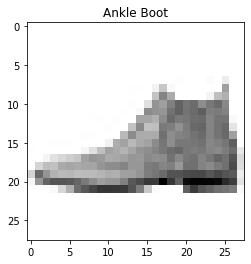

In [ ]:
# 첫 번째 데이터의 이미지와 라벨을 가져옵니다.
x, y = test_data[0]

# 이미지와 정답 라벨을 출력해 봅니다.
img = x.squeeze()   # [1, 28, 28] -> [28, 28]
plt.imshow(img, cmap='Greys')
plt.title(labels_map[y])
plt.show()


In [ ]:
# 테스트 모드
model.eval()

# 모델과 같은 device(GPU)에 입력 데이터를 탑재합니다.
x = x.to(device)

with torch.no_grad():
    # 예측 수행
    pred = model(x)

    # 예측 및 정답 라벨
    predicted = labels_map[pred[0].argmax(0).item()]
    actual = labels_map[y]
    
    print(f'Predicted: "{predicted}", Actual: "{actual}"')


Predicted: "Ankle Boot", Actual: "Ankle Boot"


위 결과가 정답 라벨과 일치하나요?  

이제 전체 테스트 데이터에 대해 예측을 수행해보고 얼마나 맞췄는지 정확도를 평가해 보겠습니다.  


In [ ]:
import numpy as np


y_pred = []
y_true = []

model.eval()

# 전체 테스트 데이터에 대해 반복 수행 (반복단위: 배치 사이즈)
for inputs, labels in test_dataloader:
    inputs, labels = inputs.to(device), labels.to(device)

    # 예측
    output = model(inputs)

    output = output.argmax(1).detach().cpu().numpy()
    y_pred.extend(output) # 예측치 저장
    
    labels = labels.detach().cpu().numpy()
    y_true.extend(labels) # 정답값 저장


# 정답의 평균 계산 => 정확도
accuracy = (np.array(y_pred) == np.array(y_true)).mean()

print('테스트 정확도:', accuracy * 100, '%')


테스트 정확도: 78.23 %


마지막으로 정답과 오답을 클래스 별로 표시하는 Confusion Matrix를 그려 보도록 하겠습니다.  


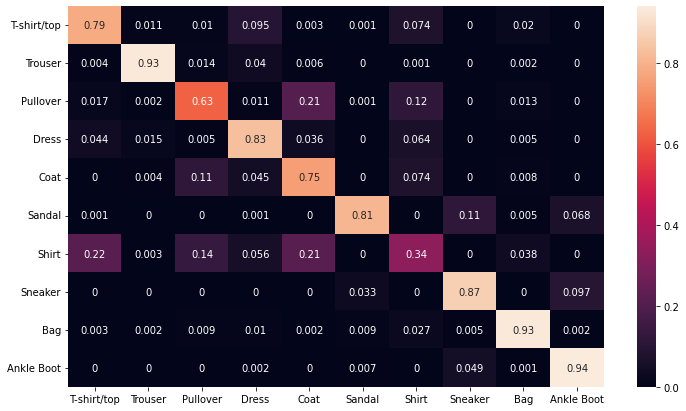

In [ ]:
## confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd


# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')


# sklearn 모듈을 이용하여 confusion_matrix를 생성합니다.
# 위에서 계산한 y_pred와 y_true를 사용합니다.
cf_matrix = confusion_matrix(y_true, y_pred)


# 화면에 나타내기 위해 중간 형태인 Pandas 데이터 프레임을 생성합니다.
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])


# seaborn 모듈을 이용하여 화면에 테이블히트맵 형태로 그려봅니다.
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.show()

# Homework

## Q1. Binary Classification의 손실함수 계산

In [ ]:
# binary classification

y1 = 1
y2 = 0

# model output
p1 = 0.8
p2 = 0.3

# 손실함수(i.e. binary cross entropy)를 직접 계산해보세요.


## Q2. Multi-class Classification의 손실함수 계산

In [ ]:
# multi-class classification

y1 = [1,0,0]
y2 = [0,1,0]

# model output
p1 = [0.7, 0.2, 0.1]
p2 = [0.1, 0.6, 0.3]

# 손실함수 (i.e. cross entropy)를 직접 계산해보세요.


## Q3. 왜 손실함수로 accuracy는 사용하지 못할까?

## Q4. 활성화함수의 종류와 쓰는 이유는?

## Q5. 위의 트레이닝 과정을 보면 한 epoch 안에서 loss가 종종 증가함을 볼 수 있다. 왜 loss가 단소감소하지 않을 수 있는지 이유를 생각해보시오.